<a href="https://colab.research.google.com/github/UnplugCharger/FromZero-to-Gans-2/blob/main/Zero_to_Gans_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
from torchvision.datasets import  MNIST

In [4]:
dataset= MNIST(root='/content/drive/MyDrive/Hackathon/MNIST',download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset=MNIST(root='/content/drive/MyDrive/Hackathon/MNIST',train=False)

In [7]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Hackathon/MNIST
    Split: Test

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2F93FCA470>, 5)

In [9]:
import matplotlib.pyplot as plt

Label 5


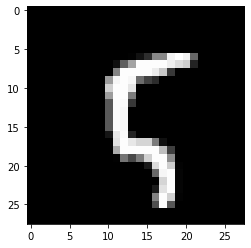

In [10]:
image,label=dataset[100]
plt.imshow(image,cmap='gray')
print('Label',label)

In [11]:
from torchvision import  transforms

In [12]:
dataset=MNIST(root='/content/drive/MyDrive/Hackathon/MNIST',train=True,transform=transforms.ToTensor())

In [13]:
image_tensor,label= dataset[0]
print(image_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [14]:
image_tensor,label= dataset[10]
print(image_tensor.shape,label)

torch.Size([1, 28, 28]) 3


In [15]:
from torch.utils.data import  random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [16]:
from torch.utils.data import  DataLoader
batch_size=64
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

#MODEL

In [17]:
import torch.nn as nn
input_size=28*28
num_classes=10
# logistic regression
model=nn.Linear(input_size,num_classes)

In [18]:
model

Linear(in_features=784, out_features=10, bias=True)

In [19]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out 


model=MnistModel()
  

In [20]:
for images ,labels in train_loader:
  outputs=model(images)
  break 



In [21]:
print(outputs.shape)

torch.Size([64, 10])


In [22]:
outputs[0]

tensor([ 0.1031, -0.5657, -0.2095, -0.3589, -0.1398,  0.1376, -0.1259,  0.1907,
        -0.0414,  0.1717], grad_fn=<SelectBackward>)

In [23]:
torch.exp(outputs[0])

tensor([1.1086, 0.5680, 0.8110, 0.6984, 0.8696, 1.1476, 0.8817, 1.2101, 0.9594,
        1.1873], grad_fn=<ExpBackward>)

In [24]:
exps=torch.exp(outputs[0])

In [25]:
probs= exps/torch.sum(exps)

In [26]:
probs

tensor([0.1174, 0.0602, 0.0859, 0.0740, 0.0921, 0.1215, 0.0934, 0.1282, 0.1016,
        0.1258], grad_fn=<DivBackward0>)

In [27]:
torch.sum(probs)

tensor(1.0000, grad_fn=<SumBackward0>)

In [29]:
## applyingsoftmax to eaach row

import torch.nn.functional as F

In [30]:
probs=F.softmax(outputs,dim=1)

In [33]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([7, 6, 2, 5, 7, 5, 7, 7, 5, 5, 4, 7, 7, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 2,
        0, 5, 5, 6, 6, 0, 5, 5, 5, 4, 7, 5, 5, 5, 5, 5, 7, 5, 5, 9, 6, 5, 5, 5,
        9, 5, 1, 5, 9, 5, 5, 9, 8, 5, 5, 7, 7, 9, 7, 5])
tensor([0.1282, 0.1428, 0.1297, 0.1337, 0.1245, 0.1262, 0.1283, 0.1399, 0.1248,
        0.1117, 0.1338, 0.1181, 0.1396, 0.1293, 0.1510, 0.1375, 0.1221, 0.1240,
        0.1588, 0.1259, 0.1300, 0.1121, 0.1335, 0.1236, 0.1321, 0.1400, 0.1469,
        0.1515, 0.1328, 0.1304, 0.1418, 0.1167, 0.1297, 0.1189, 0.1231, 0.1643,
        0.1206, 0.1358, 0.1395, 0.1521, 0.1363, 0.1418, 0.1230, 0.1296, 0.1281,
        0.1499, 0.1262, 0.1146, 0.1384, 0.1398, 0.1194, 0.1330, 0.1445, 0.1450,
        0.1289, 0.1564, 0.1194, 0.1196, 0.1485, 0.1223, 0.1262, 0.1265, 0.1359,
        0.1152], grad_fn=<MaxBackward0>)


In [34]:
labels

tensor([0, 2, 6, 4, 3, 7, 4, 6, 5, 1, 1, 5, 8, 5, 5, 2, 2, 8, 5, 4, 8, 8, 5, 6,
        3, 8, 5, 2, 4, 0, 6, 4, 5, 4, 8, 3, 3, 2, 9, 0, 4, 0, 8, 7, 4, 2, 8, 4,
        7, 0, 1, 0, 5, 8, 3, 4, 9, 9, 7, 4, 7, 6, 5, 5])

In [35]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))


In [36]:
accuracy(outputs,labels)

tensor(0.2031)

In [37]:
loss_fn=F.cross_entropy

In [39]:
loss=loss_fn(outputs,labels)
loss

tensor(2.2635, grad_fn=<NllLossBackward>)

# Trainning the Model

In [47]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out 

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss
  def validation_step(self,batch):
    images,labels= batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc= accuracy(out,labels)
    return {'val_loss':loss, 'val_acc':acc}
  
  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss= torch.stack(batch_losses).mean()
    batch_acc=[x['val_acc'] for x in outputs]
    epoch_acc= torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [42]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [45]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.1176353469491005, 'val_loss': 2.3076541423797607}

In [48]:
history1 = fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6873, val_acc: 0.7343
Epoch [1], val_loss: 1.3280, val_acc: 0.7912
Epoch [2], val_loss: 1.1168, val_acc: 0.8128
Epoch [3], val_loss: 0.9814, val_acc: 0.8271
Epoch [4], val_loss: 0.8883, val_acc: 0.8343
Epoch [5], val_loss: 0.8204, val_acc: 0.8421
Epoch [6], val_loss: 0.7686, val_acc: 0.8464
Epoch [7], val_loss: 0.7276, val_acc: 0.8508
Epoch [8], val_loss: 0.6942, val_acc: 0.8537
Epoch [9], val_loss: 0.6665, val_acc: 0.8568
Epoch [10], val_loss: 0.6430, val_acc: 0.8586
Epoch [11], val_loss: 0.6227, val_acc: 0.8612
Epoch [12], val_loss: 0.6053, val_acc: 0.8632
Epoch [13], val_loss: 0.5899, val_acc: 0.8651
Epoch [14], val_loss: 0.5761, val_acc: 0.8663
Epoch [15], val_loss: 0.5639, val_acc: 0.8678
Epoch [16], val_loss: 0.5529, val_acc: 0.8683
Epoch [17], val_loss: 0.5429, val_acc: 0.8698
Epoch [18], val_loss: 0.5337, val_acc: 0.8706
Epoch [19], val_loss: 0.5254, val_acc: 0.8718
Epoch [20], val_loss: 0.5176, val_acc: 0.8736
Epoch [21], val_loss: 0.5106, val_acc: 0.874